## Importação das bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime

# Configurações para melhorar a visualização
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

## Carregamento e preparação dos dados

In [13]:
# Leitura dos dados
df = pd.read_csv('USD_BRL_hist.csv')
df['Data'] = pd.to_datetime(df['Data'], format='%d.%m.%Y')
df = df.sort_values('Data')

In [12]:
# Adicionando colunas para facilitar análises temporais
df['Ano'] = df['Data'].dt.year
df['Mês'] = df['Data'].dt.month
df['Mês_Nome'] = df['Data'].dt.strftime('%b')
df['Ano_Mês'] = df['Data'].dt.strftime('%Y-%m')
df['Trimestre'] = 'Q' + df['Data'].dt.quarter.astype(str)

## Agregações dos dados para diferentes visualizações

In [4]:
# Agregação mensal para gráficos de tendência
df_monthly = df.groupby('Ano_Mês').agg({'USD_BRL': 'mean'}).reset_index()
df_monthly['Data'] = pd.to_datetime(df_monthly['Ano_Mês'] + '-01')
df_monthly = df_monthly.sort_values('Data')

# Agregação anual
df_yearly = df.groupby('Ano').agg({
    'USD_BRL': ['mean', 'min', 'max', 'std']
}).reset_index()
df_yearly.columns = ['Ano', 'Média', 'Mínimo', 'Máximo', 'Desvio_Padrão']
df_yearly = df_yearly.sort_values('Ano')

# Médias mensais por ano para comparação
df_month_by_year = df.groupby(['Ano', 'Mês']).agg({'USD_BRL': 'mean'}).reset_index()
df_month_by_year['Mês_Nome'] = df_month_by_year['Mês'].apply(lambda x: datetime(2000, x, 1).strftime('%b'))
df_month_by_year = df_month_by_year.sort_values(['Ano', 'Mês'])

# Visualizando os dados agregados por ano
df_yearly

,Ano,Média,Mínimo,Máximo,Desvio_Padrão
0,2010,1.759219,1.6522,1.8850,0.053122
1,2011,1.674485,1.5383,1.9033,0.095976
2,2012,1.954631,1.6950,2.1361,0.124598
3,2013,2.159236,1.9447,2.4524,0.142213
4,2014,2.354403,2.1856,2.7384,0.137436
5,2015,3.336008,2.5724,4.1780,0.430631
6,2016,3.483567,3.1151,4.1575,0.279818
7,2017,3.192651,3.0575,3.3710,0.073268
8,2018,3.654683,3.1465,4.2077,0.291551
9,2019,3.945705,3.6440,4.2638,0.159753


## 1. Gráfico de linha - Evolução da taxa USD/BRL mês a mês

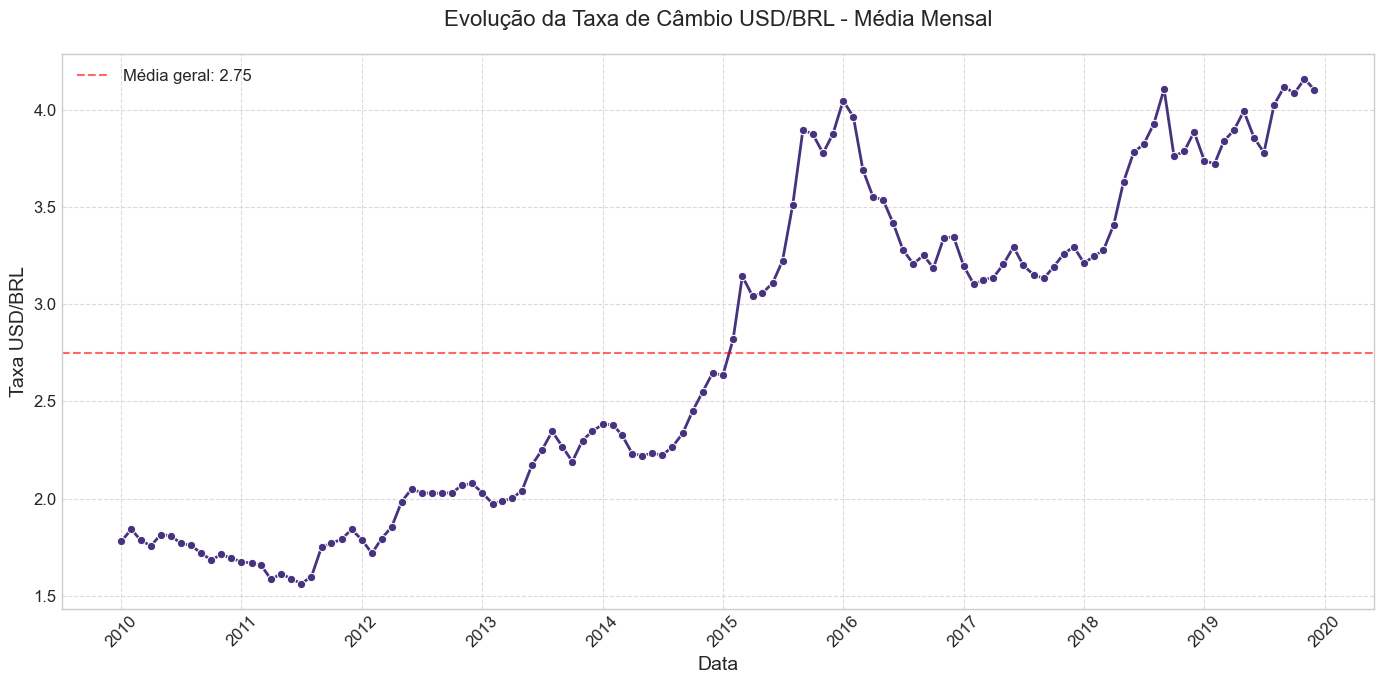

In [5]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='Data', y='USD_BRL', data=df_monthly, marker='o', linewidth=2)

# Formatação do gráfico
plt.title('Evolução da Taxa de Câmbio USD/BRL - Média Mensal', fontsize=16, pad=20)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Taxa USD/BRL', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Adicionando linhas horizontais para referência
plt.axhline(y=df['USD_BRL'].mean(), color='r', linestyle='--', alpha=0.6, label=f'Média geral: {df["USD_BRL"].mean():.2f}')

plt.legend()
plt.tight_layout()
plt.show()

## 2. Gráfico de barras para médias anuais

C:\Users\igorm\AppData\Local\Temp\ipykernel_548\1177602631.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




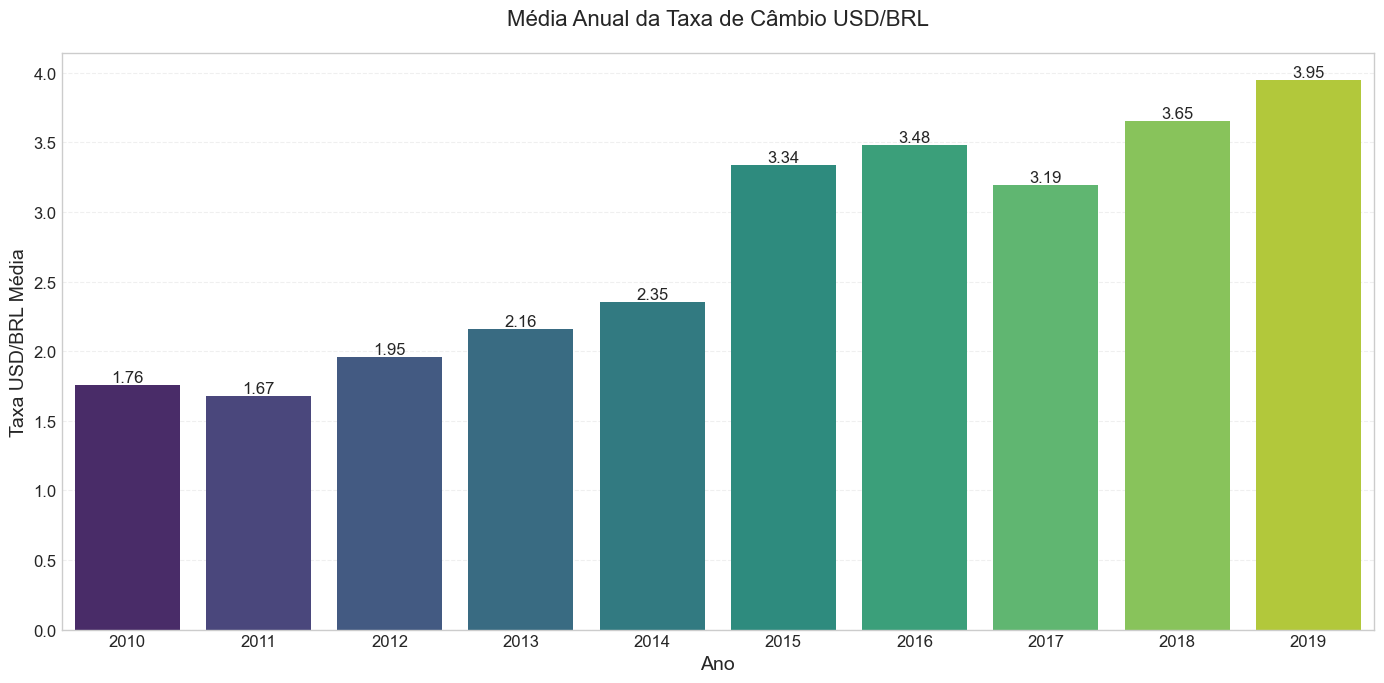

In [11]:
plt.figure(figsize=(14, 7))
ax = sns.barplot(x='Ano', y='Média', data=df_yearly, palette='viridis')

# Formatação do gráfico
plt.title('Média Anual da Taxa de Câmbio USD/BRL', fontsize=16, pad=20)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Taxa USD/BRL Média', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3, axis='y')

# Adicionar os valores nas barras
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

## 3. Visualizando a variação anual em um gráfico boxplot

C:\Users\igorm\AppData\Local\Temp\ipykernel_548\1356144219.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




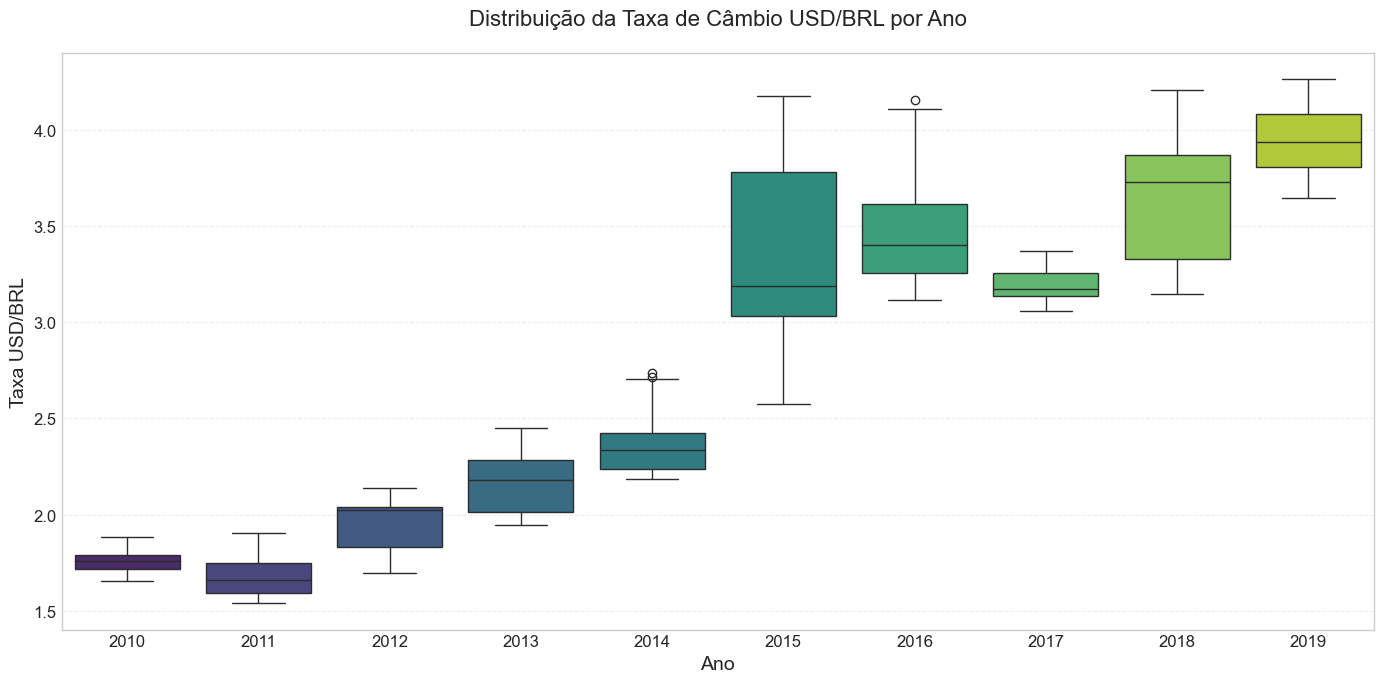

In [9]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Ano', y='USD_BRL', data=df, palette='viridis')

plt.title('Distribuição da Taxa de Câmbio USD/BRL por Ano', fontsize=16, pad=20)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Taxa USD/BRL', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3, axis='y')

plt.tight_layout()
plt.show()